<a href="https://colab.research.google.com/github/utopian18/projects_data_science/blob/main/Downloading_MNIST_dataset_from_yann_LeCun_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

In [ ]:
urls = [
        'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
]

In [ ]:
res = requests.get(urls[0])

In [ ]:
with open('train_images.gz', 'wb') as file:
  file.write(res.content)

In [ ]:
import os

In [ ]:
os.path.getsize('/content/train_images.gz')

9912422

In [ ]:
def download_image(file, target):
  res = requests.get(file)
  with open(target,'wb') as file:
    file.write(res.content)

In [ ]:
download_image(urls[0], 'train_image.gz')
download_image(urls[1], 'train_label.gz')

In [ ]:
download_image(urls[2], 'test_images.gz')
download_image(urls[3], 'test_label.gz')

In [ ]:
import gzip
import numpy as np

In [ ]:
with gzip.open('/content/train_images.gz', 'rb') as file:
  data = np.frombuffer(file.read(), dtype= np.int8, offset= 16)

FileNotFoundError: ignored

In [ ]:
data.shape

(47040000,)

In [ ]:
def image_process(file_name):
  with gzip.open(file_name, 'rb') as file:
    data = np.frombuffer(file.read(), dtype= np.int8, offset= 16)
    data = data/255
  return data.reshape(-1,1,28,28)


In [ ]:
def label_process(file_name):
  with gzip.open(file_name) as file:
    data = np.frombuffer(file.read(),dtype=np.int8, offset = 8 )
    return data

In [ ]:
X_train = image_process('/content/train_image.gz')
X_test = image_process('/content/test_images.gz')

In [ ]:
y_train = label_process('/content/train_label.gz')
y_test = label_process('/content/test_label.gz')

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
#visualization

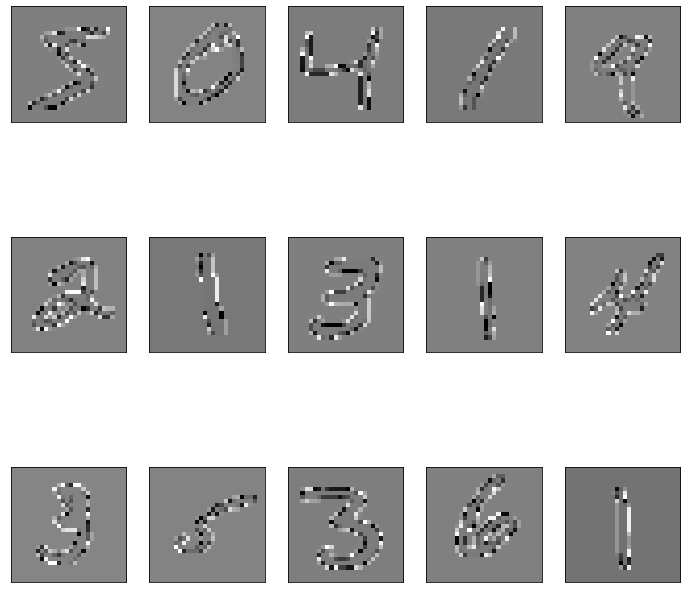

In [ ]:
plt.figure(figsize=(12,12))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(X_train[i][0], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])

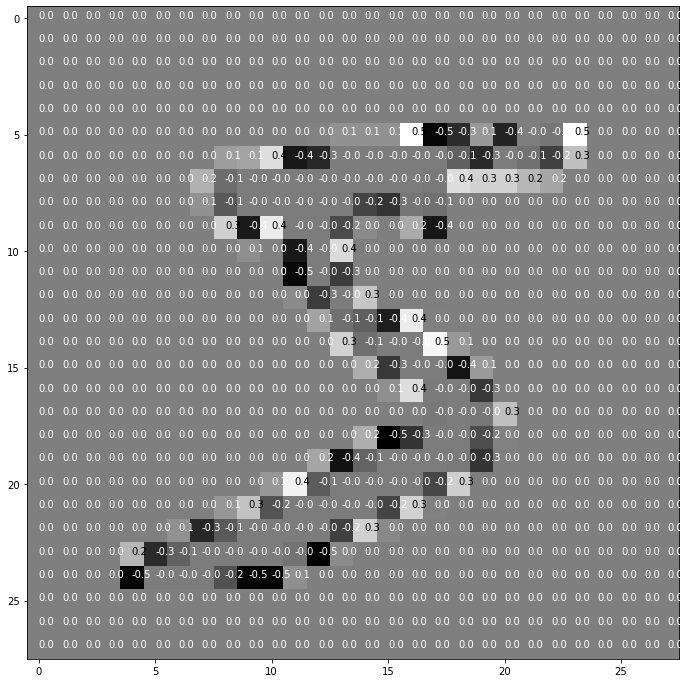

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
w,h = X_train[0][0].shape
ax.imshow(X_train[0][0], cmap ='gray')
thresh = X_train[0][0].max()/2.5
for row in range(w):
  for col in range(h):
    ax.annotate(round(X_train[0][0][row][col],1), xy = (col, row), color= 'white' if X_train[0][0][row][col]< thresh else 'black')

In [ ]:
#validation set

In [ ]:
shuffled_indices = np.random.permutation(X_train.shape[0])
validation_length = int(X_train.shape[0]*0.2)
validation_indices = shuffled_indices[:validation_length]
train_indices = shuffled_indices[validation_length:]

In [ ]:
X_val = X_train[validation_indices]
y_val = y_train[validation_indices]
X_train = X_train[train_indices]
y_train = y_train[train_indices]

In [ ]:
#model

In [ ]:
import tensorflow as tf

In [ ]:
input_layers = tf.keras.layers.Input(28*28,)
dense_layers = tf.keras.layers.Dense(64, activation ='relu')
x = dense_layers(input_layers)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_layers = tf.keras.layers.Dense(10)(x)


In [ ]:
model = tf.keras.Model(inputs = input_layers, outputs= output_layers, name= 'model_tf' )

In [ ]:
model.summary()

Model: "model_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_r = X_train.reshape(-1,784)
X_test_r = X_test.reshape(-1, 784)
X_val_r = X_val.reshape(-1, 784)

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x=X_train_r, y=y_train, validation_data=(X_val_r, y_val), epochs= 5, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.6547 - accuracy: 0.1805 - val_loss: 3.4628 - val_accuracy: 0.2577
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.4283 - accuracy: 0.2753 - val_loss: 3.3333 - val_accuracy: 0.3077
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.8803 - accuracy: 0.2088 - val_loss: 2.3024 - val_accuracy: 0.1104
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3022 - accuracy: 0.1151 - val_loss: 2.3029 - val_accuracy: 0.1119
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.1154 - val_loss: 2.3024 - val_accuracy: 0.1092


In [ ]:
history = model.fit(X_train_r, y_train, epochs=15, validation_data=(X_val_r, y_val), batch_size=64)

Epoch 1/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1139 - val_loss: 2.3024 - val_accuracy: 0.1093
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1139 - val_loss: 2.3024 - val_accuracy: 0.1089
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1088
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3020 - accuracy: 0.1141 - val_loss: 2.3024 - val_accuracy: 0.1085
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3024 - accuracy: 0.1122 - val_loss: 2.3026 - val_accuracy: 0.1013
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1064 - val_loss: 2.3026 - val_accuracy: 0.1006
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 2.3024 - accuracy: 0.1060 - val_loss: 2.3026 - val_accuracy: 0.1006
Epoch 

In [ ]:
train_set = image_process('/content/train_images.gz')

In [ ]:
train_set.reshape(-1, 28,28).shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

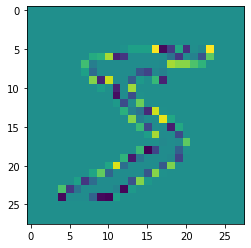

In [ ]:
plt.imshow(train_set[0][0])

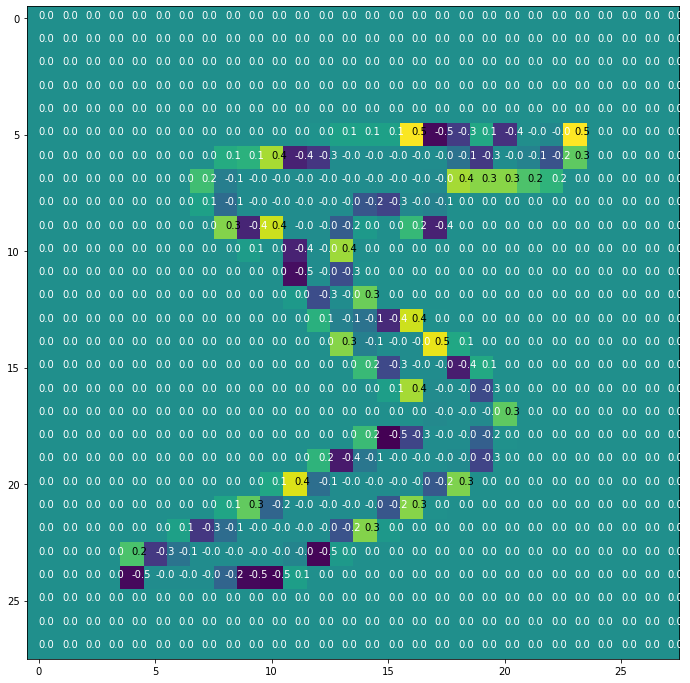

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
w, h = train_set[0][0].shape
thresh = train_set[0][0].max()/2.5
ax.imshow(train_set[0][0])
for row in range(w):
  for col in range(h):
    ax.annotate(round(train_set[0][0][row][col],1), xy= (col, row), color = 'white' if train_set[0][0][row][col]<thresh else 'black')


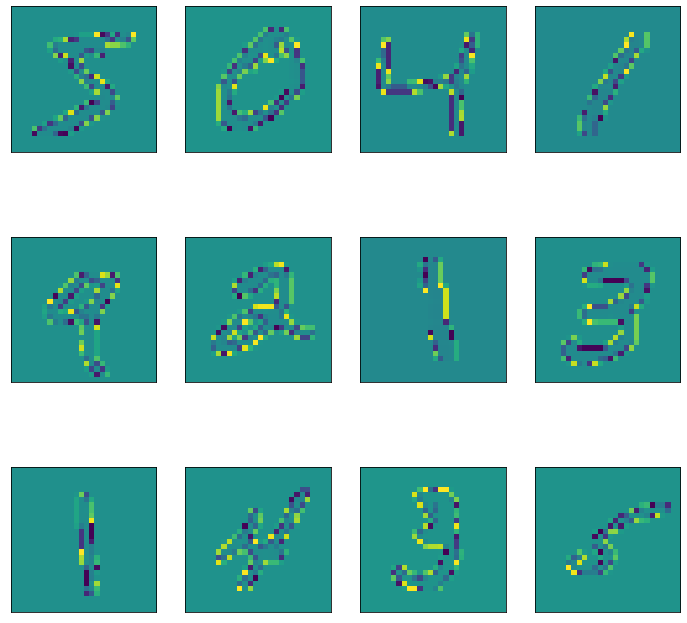

In [ ]:
plt.figure(figsize=(12,12))
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(train_set[i][0])
  plt.xticks([])
  plt.yticks([])
plt.show()

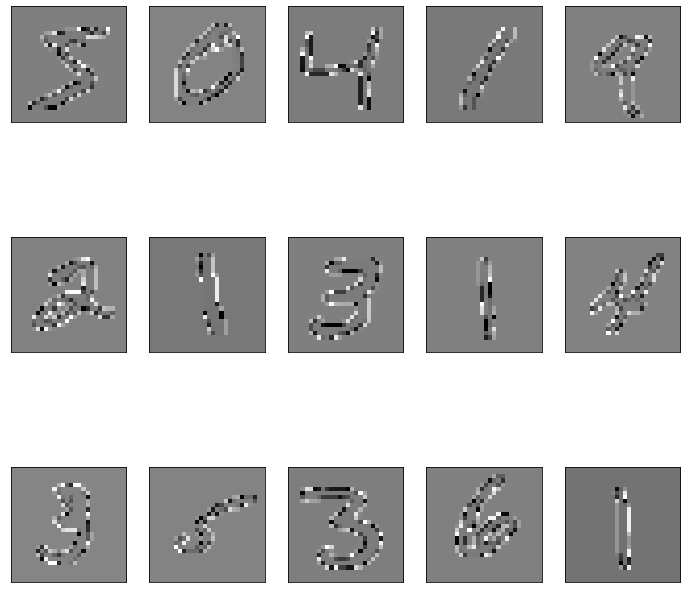

In [ ]:
plt.figure(figsize=(12,12))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(train_set[i][0], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
plt.show()

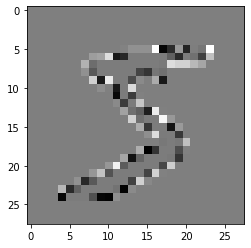

In [ ]:
plt.imshow(train_set[0][0], cmap= 'gray')

In [ ]:
train_set[0][0][0][2]

0.0

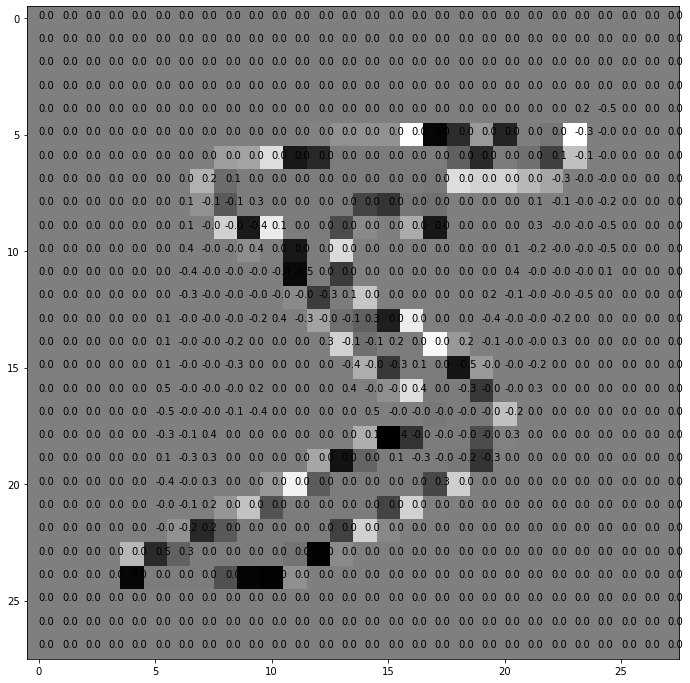

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
w,h = train_set[0][0].shape
ax.imshow(train_set[0][0], cmap = 'gray')
for px1 in range(w):
  for px2 in range(h):
    ax.annotate(round(train_set[0][0][px1][px2], 1), xy= (px1, px2))

In [ ]:
import matplotlib.pyplot as plt

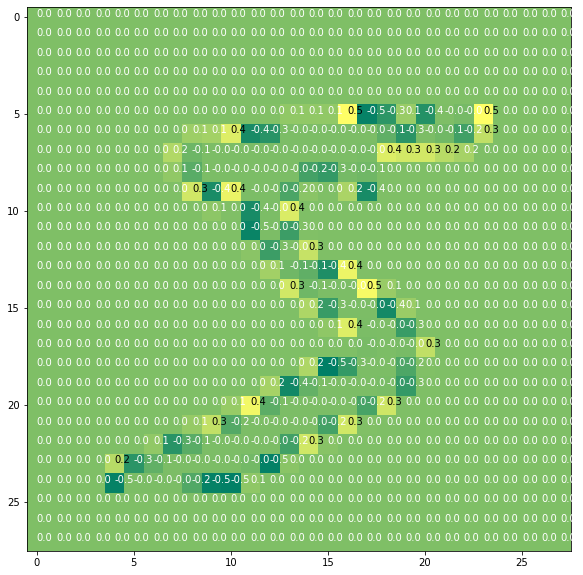

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(train_set[0][0], cmap='summer')
w, h = train_set[0][0].shape
thresh = train_set[0][0].max()/2.5

for row in range(w):
  for col in range(h):
    ax.annotate(str(round(train_set[0][0][row][col], 1)), xy=(col, row),color='white' if train_set[0][0][row][col] < thresh else 'black' )

In [ ]:
#step 1. define a sequential model
model_cnn = tf.keras.models.Sequential()
#conv layer set (conv > pool > normal)
model_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation ='relu', input_shape=(28,28,1)))
#input_shape must be 3 dimension er hote hobe 28,28,1 not 28,28, the last one is color channel
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.BatchNormalization())
#conv set
model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation ='relu'))
model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation ='relu' ))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.BatchNormalization())

# dense layers (flatten > dense input > dense output  )
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(512, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
# model_cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# mode_cnn.fit(X_train, y_t)


In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 256)        0

In [ ]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)
# X_val_cnn = X_val.reshape(-1,28,28,1)


In [ ]:
model_cnn.fit(X_train_cnn, y_train, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 377s - loss: 0.2206 - accuracy: 0.9342 - 377s/epoch - 201ms/step
Epoch 2/5
1875/1875 - 377s - loss: 0.0902 - accuracy: 0.9720 - 377s/epoch - 201ms/step
Epoch 3/5
1875/1875 - 374s - loss: 0.0589 - accuracy: 0.9826 - 374s/epoch - 200ms/step
Epoch 4/5
1875/1875 - 378s - loss: 0.0455 - accuracy: 0.9851 - 378s/epoch - 202ms/step
Epoch 5/5
1875/1875 - 377s - loss: 0.0347 - accuracy: 0.9893 - 377s/epoch - 201ms/step


In [ ]:
y_pred = model_cnn.predict(X_test_cnn)

In [ ]:
Y_pred = np.argmax(y_pred, axis=1)

In [ ]:
acc = []
for (i,j) in zip(Y_pred, y_test):
  if i == j :
    acc.append(1)
  else:
    acc.append(0)



In [ ]:
np.sum(acc)

9696

In [ ]:
len(acc)

10000

In [ ]:
np.sum(acc)/ len(acc)

0.9696